In [57]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
np.random.seed(69)

In [58]:
def magnetization(lattice):
    return np.sum(lattice/L)

def metropolis(change_E,y,x,lattice,T):
    r = np.random.random()
    E = np.exp(change_E/(k_B*T))
    if r < E:
        lattice[y,x] = -lattice[y,x]
        #note that if change_E>=0, r is always < np.exp(change_E/(k_B*T))
    return r, E, lattice

def deltaEnergy(y,x):  
    # periodic lattice
    per = np.empty([L+2,L+2],dtype=int) 
    per[1:L+1,1:L+1] = lattice
    per[0,1:L+1] = lattice[L-1]
    per[L+1,1:L+1] = lattice[0]
    per[1:L+1,0] = lattice[:,L-1]
    per[1:L+1,L+1] = lattice[:,0]
    X = x+1
    Y = y+1
    S_j = per[Y-1,X]+per[Y+1,X]+per[Y,X+1]+per[Y,X-1]
    h_i = J*S_j + h

    return -2*lattice[y,x]*h_i

def update(lattice):
    '''Perform the algorithm for simulating Ising ferromagnet.'''
    y,x = np.random.randint(L),np.random.randint(L) 
    change_E = deltaEnergy(y,x)
    r, E, lattice_f =  metropolis(change_E,y,x,lattice,T)
    M = magnetization(lattice_f)
    return y,x, change_E, r, E, M, lattice_f

C:\Users\Rene\Anaconda\lib\site-packages\matplotlib\animation.py:1218: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


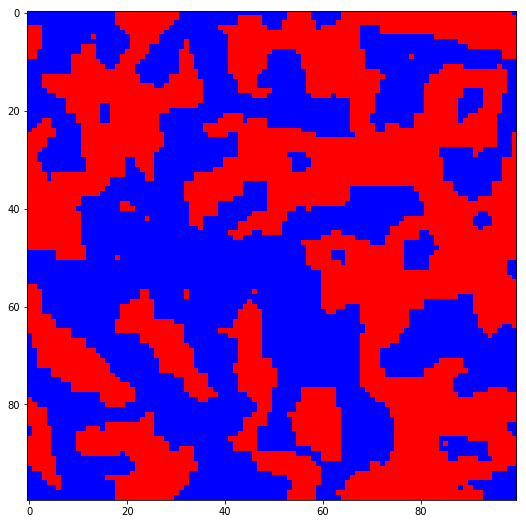

In [88]:
import matplotlib.animation as anim
plt.rcParams["figure.figsize"] = [16,8]

J = 100. # interaction constant
h = 0
L = 100
k_B = 1.
T = 2.269
iterate = 100000 # number of iterations
ic = 0 # to keep track of the number of iterations
lattice = np.random.choice([1,-1],size=[L,L])

np.random.seed(69)
ic  = 0
lattice = np.random.choice([1,-1],size=[L,L])

fig = plt.figure(figsize=(9,9))
im = []

while ic < iterate:
    y,x, change_E, r, E, M, lattice_f = update(lattice)
    #print(y,x,change_E,r,E)
    if ic%1000 == 0:
        im.append([plt.imshow(lattice_f, animated = True, cmap = 'bwr')])        
    ic += 1
    
ising = anim.ArtistAnimation(fig, im, interval = 50, blit = True)
ising.save("isingmodel.html")


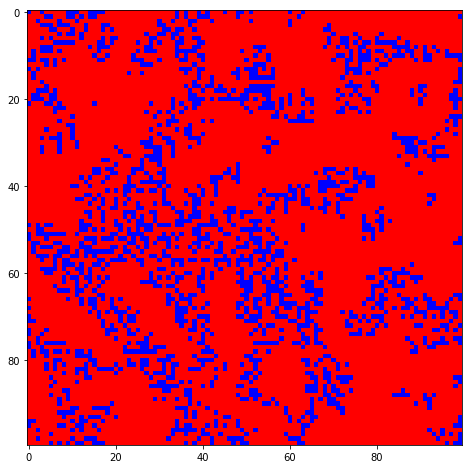

In [190]:
np.random.seed(69)
lattice = np.random.choice([1,-1],size=[L,L])
def final_isingmodel(J, h, L, k_B, iterate, T):
    
    im = []
    ic  = 0
    def mag(lattice):
        return np.sum(lattice/L)

    def metro(change_E,y,x,lattice,T):
        r = np.random.random()
        E = np.exp(change_E/(k_B*T))
        if r < E:
            lattice[y,x] = -lattice[y,x]
            #note that if change_E>=0, r is always < np.exp(change_E/(k_B*T))
        return r, E, lattice

    def dE(J,h,y,x):  
        # periodic lattice
        per = np.empty([L+2,L+2],dtype=int) 
        per[1:L+1,1:L+1] = lattice
        per[0,1:L+1] = lattice[L-1]
        per[L+1,1:L+1] = lattice[0]
        per[1:L+1,0] = lattice[:,L-1]
        per[1:L+1,L+1] = lattice[:,0]
        X = x+1
        Y = y+1
        S_j = per[Y-1,X]+per[Y+1,X]+per[Y,X+1]+per[Y,X-1]
        h_i = J*S_j + h

        return -2*lattice[y,x]*h_i

    def update(lattice):
        '''Perform the algorithm for simulating Ising ferromagnet.'''
        y,x = np.random.randint(L),np.random.randint(L) 
        change_E = dE(J,h,y,x)
        r, E, lattice_f =  metro(change_E,y,x,lattice,T)
        M = mag(lattice_f)
        return y,x, change_E, r, E, M, lattice_f
    
    while ic < iterate:
        y,x, change_E, r, E, M, lattice_f = update(lattice)
        #print(y,x,change_E,r,E)
        if ic%100000 == 0:
            #plt.imshow(lattice_f)
            lattice_f = lattice_f      
        ic += 1
        
    return lattice_f

final_isingmodel(J, h, L, k_B, iterate, T)
plt.imshow(final_isingmodel(1,5,100,1,10000, 2.269), cmap = 'bwr')

C:\Users\Rene\Anaconda\lib\site-packages\matplotlib\animation.py:1218: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


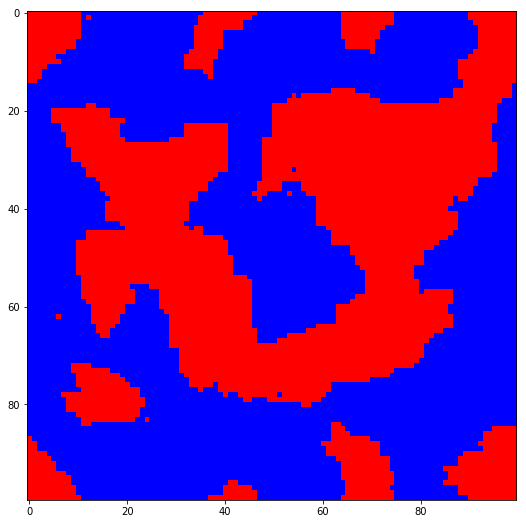

In [162]:
fig = plt.figure(figsize=(9,9))
j_images = []
for j in range(-10,10):
    if j%5:
        im = final_isingmodel(j,0,100,1,100000, 2.269)
        temp_images.append([plt.imshow(im, animated = True, cmap = 'bwr')])

ising_j = anim.ArtistAnimation(fig, j_images, interval = 10, blit = True)
ising_j.save("isingmodel_j.html")

C:\Users\Rene\Anaconda\lib\site-packages\matplotlib\animation.py:1218: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


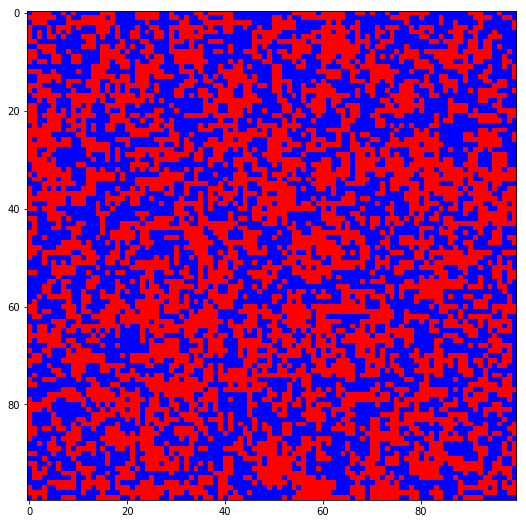

In [167]:
fig = plt.figure(figsize=(9,9))
temp_images = []
for t in np.arange(0.1,5,0.2):
    im = final_isingmodel(1,0,100,1,100000, t)
    temp_images.append([plt.imshow(im, animated = True, cmap = 'bwr')])

ising_temp = anim.ArtistAnimation(fig, temp_images, interval = 10, blit = True)
ising_temp.save("isingmodel_temperature.html")

C:\Users\Rene\Anaconda\lib\site-packages\matplotlib\animation.py:1218: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


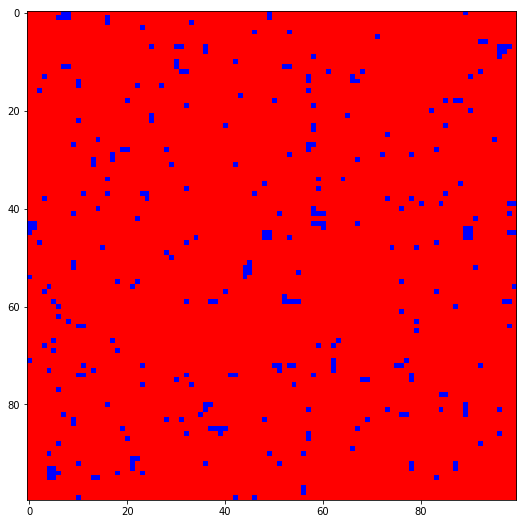

In [196]:
fig = plt.figure(figsize=(9,9))
h_images = []
for h in np.arange(-0.5,0.5,0.05):
    im = final_isingmodel(1,h,100,1,100000, 2.269)
    h_images.append([plt.imshow(im, animated = True, cmap = 'bwr')])

ising_h = anim.ArtistAnimation(fig, h_images, interval = 10, blit = True)
ising_h.save("isingmodel_h2.html")